In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


#### FOR THIS PROJECT WE ARE USING THE BELOW DATASOURCE:: "https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho"
--> we are going to establish some reasons behind selecting this dataset for our capstone project.


In [3]:
import kagglehub
import os

In [4]:
path=kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")
print(os.listdir(path))

['car data.csv', 'CAR DETAILS FROM CAR DEKHO.csv', 'Car details v3.csv', 'car details v4.csv']


In [5]:
data=pd.read_csv(os.path.join(path,'Car details v3.csv'))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Those 8128 entries and 13 columns are enough for our model training and fulfilling our overall project requirements.

This dataset is rich in both categorical and numerical features that requires extensive preprocessing and modeling with different features types, showcasing team advanced data analysis skills.

Feature such as engine, max_power, torque should be in numeric rather than object. so we will clean these columns later.

Also, some features like 'mileage','engine','seats' have missing values requiring advanced data imputation team skills.

In [11]:
data['name'].value_counts()

name
Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: count, Length: 2058, dtype: int64

The "name" column comprises of actual car brand and with thier respective model information allowing my team to engineer more features to make system more granular and precise.

It seems that the label "selling price" is right skewed and have high variations telling us that our label is diverse (could have extreme outliers as well).

<Axes: ylabel='selling_price'>

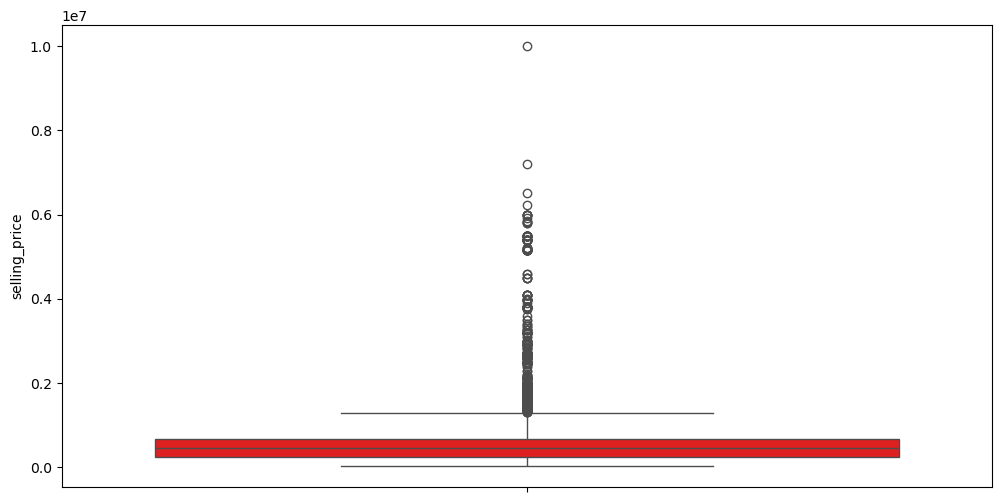

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data['selling_price'],color='red')

The dataset indeed have outliers(extreme selling price) which we will decide if these outliers are worth keeping or dropping. i.e at the end building a system trained with diverse data or limited data. 

In [16]:
def correlation(df):
    correlation={}
    for a in df.select_dtypes(include='number').columns:
        if a!='selling_price':
            correlation[a]=data[a].corr(data['selling_price'])
    plt.figure()
    sorted_dict = dict(sorted(correlation.items(), key=lambda x: x[1], reverse=True))
    plt.figure(figsize=(12,5))
    sns.barplot(x=sorted_dict.keys(),y=sorted_dict.values(),palette='Set1')
    plt.axhline(y=0,lw=2,color='black')
    plt.xticks(rotation=90)
    return sorted_dict
    

C:\Users\rautu\AppData\Local\Temp\ipykernel_11584\2445390375.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_dict.keys(),y=sorted_dict.values(),palette='Set1')


{'year': 0.41409186055715064,
 'seats': 0.041357829229452595,
 'km_driven': -0.22553375557218916}

<Figure size 640x480 with 0 Axes>

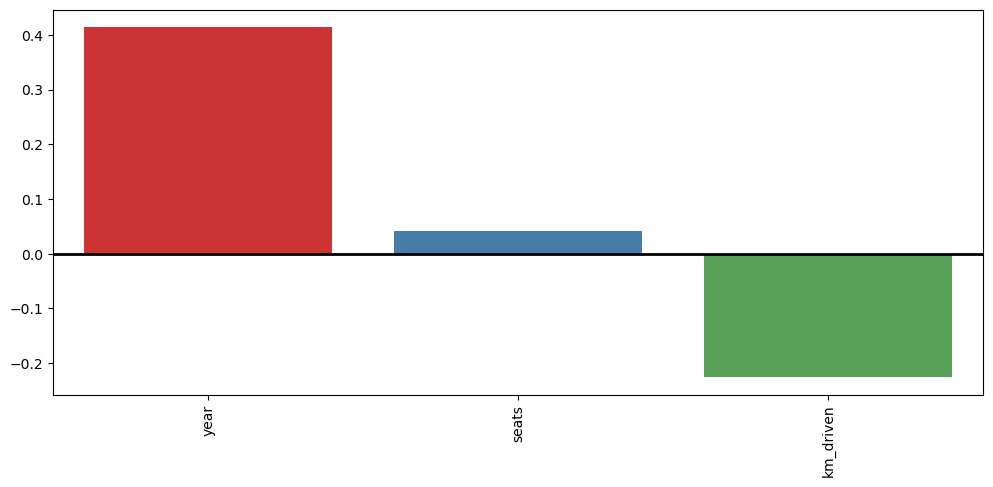

In [17]:
correlation(df=data)

Based on the above quick correlation check between numeric features and selling price, it is clear that the features and label relationship reflects the real business trend. For example: the above chart reveals that:
1. year have positive correlation with selling price. (NEWER CARS ARE MORE EXPENSIVE)
2. km_driven has negative relationship with selling price.(SHOWS THAT CARE WITH HIGH ODOMETER READING HAVE LESS RESELL VALUE)
3. seats have not much effect on car resell value.

Thus this dataset perfectly matches our charter’s goals: it has target variability, meaningful predictive features, outliers for risk detection, and rich opportunities for feature engineering, modeling, and dashboard integration. It allows us to deliver a fully functional, business-relevant predictive pricing system, not just a theoretical exercise.

In [20]:
def check_null(df):
    null_count={}
    for cols in df.columns:
        total_nulls=df[cols].isnull().sum()
        percent_of_total=(total_nulls/len(df))*100
        if total_nulls:
            null_count[cols]=[total_nulls,percent_of_total]
    null_df=pd.DataFrame(null_count, index=['total_nulls','percent_of_total']).transpose()
    plt.figure(figsize=(12,5))
    sns.barplot(x=null_df.index,y=null_df['total_nulls'],palette='Set1')
    plt.xticks(rotation=90)
    return null_count
    
    

C:\Users\rautu\AppData\Local\Temp\ipykernel_11584\1851875873.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_df.index,y=null_df['total_nulls'],palette='Set1')


{'mileage': [221, 2.718996062992126],
 'engine': [221, 2.718996062992126],
 'max_power': [215, 2.645177165354331],
 'torque': [222, 2.731299212598425],
 'seats': [221, 2.718996062992126]}

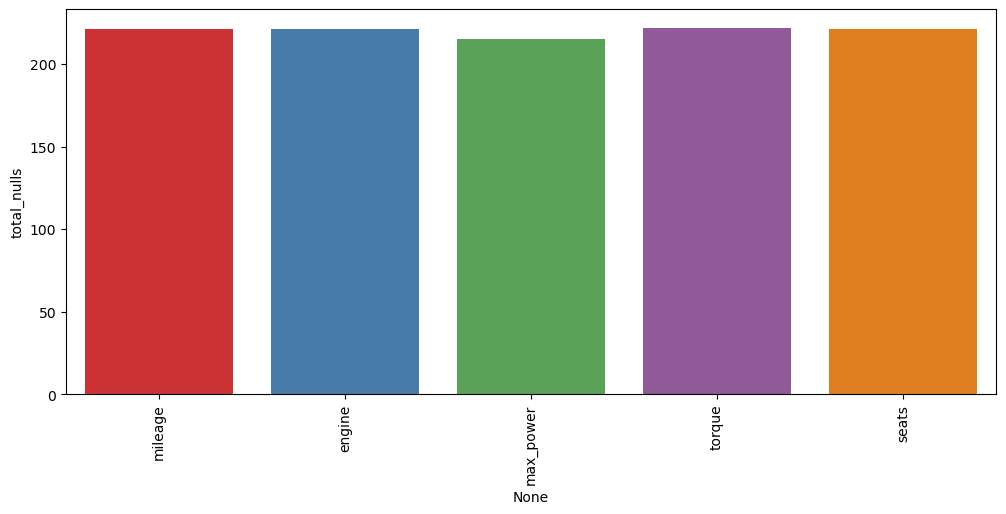

In [21]:
check_null(data)

In [22]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [23]:
def same_null_index(df):
    same_index=[]
    cols=[col for col in df.columns if df[col].isnull().any()]
    if not cols:
        return []
    same_index=df[df[cols[0]].isnull()].index.to_list()
    for i in range(1, len(cols)):
        index_two=df[df[cols[i]].isnull()].index.to_list()
        same_index=[index for index in same_index if index in index_two]
        
    return same_index

In [24]:
len(same_null_index(data))

215

In [25]:
data.loc[same_null_index(data)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [26]:
data['selling_price'].corr(data['seller_type'].map({'Individual':0,'Dealer':1,'Trustmark Dealer':2}))

0.3230474088437475

In [27]:
data['selling_price'].corr(data['transmission'].map({'Manual':0,'Automatic':1}))

0.588845167570116

In [28]:
data.groupby('transmission')['seller_type'].value_counts()

transmission  seller_type     
Automatic     Individual           492
              Dealer               459
              Trustmark Dealer      99
Manual        Individual          6274
              Dealer               667
              Trustmark Dealer     137
Name: count, dtype: int64

i have decided to fill the nan where we have automatic transmission.Based on above correlation analysis, the feature"transmission" have moderate relationship with our label. since this feature is heavely dominated by 'manual' class,imputing missing values for Automatic rows helps preserve the variation in this minority class.on the other hand, we have decided to drop those rows with same missing values across all columns for 'manual' transmission.This approach removes low-information rows in the majority class while keeping the meaningful variation in the Automatic subset.

In [30]:
data.loc[same_null_index(data)].groupby('transmission').agg('count') 

,name,year,selling_price,km_driven,fuel,seller_type,owner,mileage,engine,max_power,torque,seats
transmission,,,,,,,,,,,,
Automatic,9,9,9,9,9,9,9,0,0,0,0,0
Manual,206,206,206,206,206,206,206,0,0,0,0,0


As we talked earlier ,we will now drop those 206 rows with manual transmission and fill missing values of those 9 rows with Automatic transmission.

In [32]:
data=data.drop(data.loc[same_null_index(data)][data.loc[same_null_index(data)]['transmission']=='Manual'].index)

In [33]:
data=data.reset_index(drop=True)

I have dropped those missing rows with manual transmission. 

In [35]:
same_null_index(data) #gives me those index with missing values of only Automatic Transmission. 

[133, 753, 1156, 2423, 2771, 4973, 5463, 6227, 6431]

next step involve filling those nan::

In [37]:
data.loc[same_null_index(data)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
133,BMW X1 sDrive 20D xLine,2017,2150000,27000,Diesel,Dealer,Automatic,First Owner,NaN,NaN,NaN,NaN,NaN
753,Skoda Superb 1.8 TSI,2010,400000,60000,Petrol,Individual,Automatic,Second Owner,NaN,NaN,NaN,NaN,NaN
1156,Hyundai Santro Xing XG AT eRLX Euro III,2004,80000,80000,Petrol,Individual,Automatic,Third Owner,NaN,NaN,NaN,NaN,NaN
2423,Honda City 1.5 GXI CVT,2005,250000,90000,Petrol,Individual,Automatic,Second Owner,NaN,NaN,NaN,NaN,NaN
2771,Hyundai Santro Xing XG AT,2004,130000,100000,Petrol,Individual,Automatic,Second Owner,NaN,NaN,NaN,NaN,NaN
4973,Hyundai Santro Xing XG AT eRLX Euro II,2004,80000,90000,Petrol,Individual,Automatic,Second Owner,NaN,NaN,NaN,NaN,NaN
5463,Hyundai Santro AT,2005,120000,190000,Petrol,Individual,Automatic,Second Owner,NaN,NaN,NaN,NaN,NaN
6227,Hyundai Santro Xing XG AT eRLX Euro II,2006,95000,100000,Petrol,Individual,Automatic,Second Owner,NaN,NaN,NaN,NaN,NaN
6431,BMW 5 Series 520d Sedan,2008,890000,70000,Diesel,Individual,Automatic,Third Owner,NaN,NaN,NaN,NaN,NaN


In [38]:
hyundai_santra=data[(data['name'].str.split().str[0]=='Hyundai')&(data['name'].str.split().str[1]=='Santro')]

In [39]:
mode_value=hyundai_santra[['mileage','engine','max_power','torque','seats']].mode().iloc[0]

In [40]:
data.loc[hyundai_santra.index,['mileage','engine','max_power','torque','seats']]=data.loc[hyundai_santra.index,['mileage','engine','max_power','torque','seats']].fillna(mode_value)

for the rest of those filling 'nan' steps, i will automate it using a function as i will be filling with the mode values for those missing one based on the car name and variant. the steps in the function consists of same logic as we used in filling above "hyundai_santra" missing values.

In [42]:
first_similiar_index=data.iloc[same_null_index(data)].index.to_list()

In [43]:
data.iloc[same_null_index(data)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
133,BMW X1 sDrive 20D xLine,2017,2150000,27000,Diesel,Dealer,Automatic,First Owner,NaN,NaN,NaN,NaN,NaN
753,Skoda Superb 1.8 TSI,2010,400000,60000,Petrol,Individual,Automatic,Second Owner,NaN,NaN,NaN,NaN,NaN
2423,Honda City 1.5 GXI CVT,2005,250000,90000,Petrol,Individual,Automatic,Second Owner,NaN,NaN,NaN,NaN,NaN
6431,BMW 5 Series 520d Sedan,2008,890000,70000,Diesel,Individual,Automatic,Third Owner,NaN,NaN,NaN,NaN,NaN


In [44]:
data[(data['name'].str.split().str[0]=='Honda')&(data['name'].str.split().str[1]=='City')]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
40,Honda City i VTEC VX,2018,925000,28900,Petrol,Dealer,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
41,Honda City V MT,2013,425000,86300,Petrol,Dealer,Manual,First Owner,16.8 kmpl,1497 CC,116.3 bhp,146Nm@ 4800rpm,5.0
50,Honda City i DTEC S,2015,600000,54700,Diesel,Dealer,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
66,Honda City i DTEC VX,2015,630000,135000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7858,Honda City i VTEC VX Option,2016,750000,16151,Petrol,Dealer,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
7860,Honda City i VTEC V,2015,600000,28161,Petrol,Dealer,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
7876,Honda City ZXi AT,2005,110000,100000,Petrol,Individual,Automatic,Second Owner,12.0 kmpl,1493 CC,100 bhp,13.1kgm@ 4600rpm,5.0
7898,Honda City 2017-2020 VTEC,2006,160000,70000,Petrol,Individual,Manual,Second Owner,16.9 kmpl,1497 CC,100 bhp,"13.5@ 4,800(kgm@ rpm)",5.0


In [45]:
def fill_na_mode(data,index, cols=['mileage','engine','max_power','torque','seats']):
    brand_model = data['name'].str.split().str[:2].str.join(' ')
    for bm in brand_model.unique():
        brand_name = brand_model==bm
        mode_vals = data.loc[brand_name, cols].mode().iloc[0]
        data.loc[(brand_name & data.index.isin(index)), cols]=data.loc[(brand_name & data.index.isin(index)), cols].fillna(mode_vals)
        


In [46]:
fill_na_mode(data,index=first_similiar_index,cols=['mileage','engine','max_power','torque','seats'])

In [47]:
data.loc[same_null_index(data)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
559,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN
560,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN
1403,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,NaN,NaN,0,NaN,NaN
1404,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,NaN,NaN,0,NaN,NaN
2474,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN
2475,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN


In [48]:
second_similiar_index=data.iloc[same_null_index(data)].index.to_list()

In [49]:
fill_na_mode(data,index=second_similiar_index,cols=['mileage','engine','max_power','torque','seats'])

In [50]:
data.loc[second_similiar_index]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
559,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,19.7 kmpl,796 CC,0,62Nm@ 3000rpm,5.0
560,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,19.7 kmpl,796 CC,0,62Nm@ 3000rpm,5.0
1403,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,22.0 kmpl,1248 CC,0,190Nm@ 2000rpm,5.0
1404,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,22.0 kmpl,1248 CC,0,190Nm@ 2000rpm,5.0
2474,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,17.0 kmpl,1405 CC,0,135.4Nm@ 2500rpm,5.0
2475,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,17.0 kmpl,1405 CC,0,135.4Nm@ 2500rpm,5.0


In [51]:
same_null_index(data) #i have decided to drop this row as it 

[4806]

C:\Users\rautu\AppData\Local\Temp\ipykernel_11584\1851875873.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_df.index,y=null_df['total_nulls'],palette='Set1')


{'torque': [1, 0.012623074981065388]}

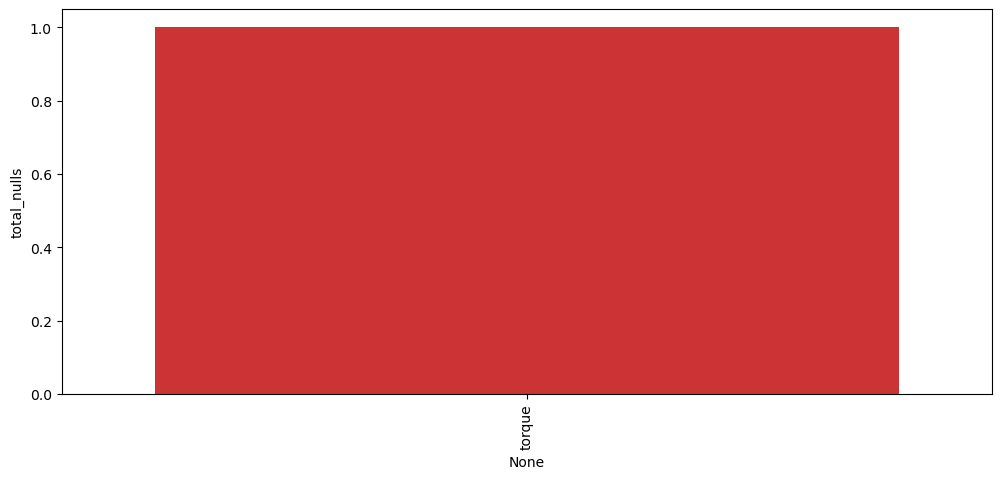

In [52]:
check_null(data)

In [53]:
data=data.drop(same_null_index(data)).reset_index(drop=True)

since this is the only one record with missing value, so i had drop this row.

In [55]:
data.shape

(7921, 13)

In [56]:
same_null_index(data)

[]

{}

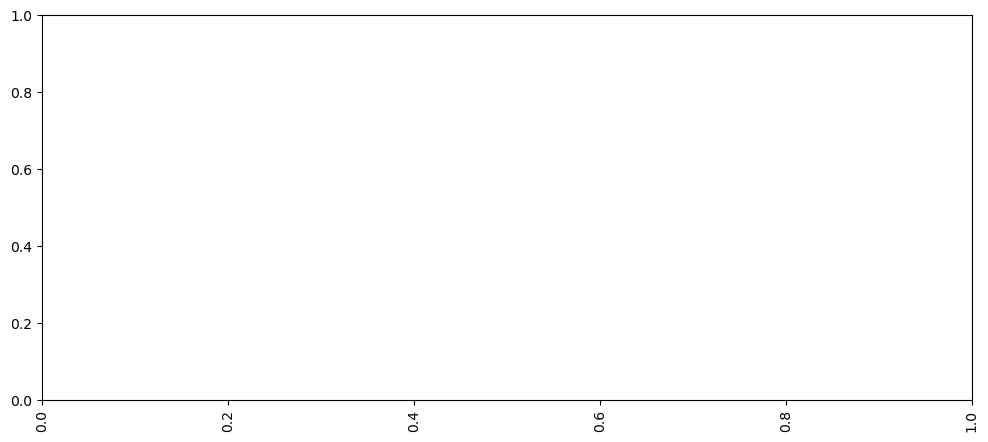

In [57]:
check_null(data)

### we have finished handling missing data. we have used both strategies where we dropped and impute the rows with missing data using customize functions. In next steps, we will work on feature extraction and changing the columns dtypes as well.

In [59]:
data['car_name']=data['name'].str.split().str[0].str.strip().str.lower()

In [60]:
data['car_variant']=data['name'].str.split().str[1].str.strip().str.lower()

i am thinking of dropping those brands with value counts less than 10 as it is impractical to keep them for training model. similarly, for those brands with less than 40 and greater than 10, i will keep the brand name and their model as "other_brand" and their respective model as "any_model".

In [62]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'car_name', 'car_variant'],
      dtype='object')

In [63]:
def car_name_based(df):
    brand_col='car_name'
    model_col='car_variant'
    brand_counts=df[brand_col].value_counts()
    less_than_10=brand_counts[brand_counts<=10].index
    df=df[~df[brand_col].isin(less_than_10)]
    between_40_and_10=brand_counts[(brand_counts<40)&(brand_counts>10)].index
    df.loc[df[brand_col].isin(between_40_and_10),brand_col]='other_brand'
    df.loc[df[brand_col]=='other_brand',model_col]='other_model'
    df=df.reset_index(drop=True)
    return df

In [64]:
car_name_based(df=data)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name,car_variant
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,maruti,swift
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,skoda,rapid
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,honda,city
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,hyundai,i20
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,maruti,swift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7883,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,hyundai,i20
7884,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,hyundai,verna
7885,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,maruti,swift
7886,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,tata,indigo


In [65]:
data=car_name_based(df=data)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7888 entries, 0 to 7887
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7888 non-null   object 
 1   year           7888 non-null   int64  
 2   selling_price  7888 non-null   int64  
 3   km_driven      7888 non-null   int64  
 4   fuel           7888 non-null   object 
 5   seller_type    7888 non-null   object 
 6   transmission   7888 non-null   object 
 7   owner          7888 non-null   object 
 8   mileage        7888 non-null   object 
 9   engine         7888 non-null   object 
 10  max_power      7888 non-null   object 
 11  torque         7888 non-null   object 
 12  seats          7888 non-null   float64
 13  car_name       7888 non-null   object 
 14  car_variant    7888 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 924.5+ KB


I am now going to have a look on few more columns ['mileage','engine','max_power','torque'] and change it's dtypes if required.

In [68]:
data['mileage']=data['mileage'].str.split().str[0].astype('float')

In [69]:
data['engine']=data['engine'].str.split().str[0].astype('int')

In [70]:
data.loc[~data['max_power'].str.contains('bhp', na=False), 'max_power'].unique()

array(['0'], dtype=object)

In [71]:
data['max_power']=data['max_power'].str.split().str[0].astype('float')

In [72]:
data[data['engine']=='0']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name,car_variant


In [73]:
data[data['max_power'] == 0]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name,car_variant
555,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,19.7,796,0.0,62Nm@ 3000rpm,5.0,maruti,alto
556,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,19.7,796,0.0,62Nm@ 3000rpm,5.0,maruti,alto
1398,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,22.0,1248,0.0,190Nm@ 2000rpm,5.0,maruti,swift
1399,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,22.0,1248,0.0,190Nm@ 2000rpm,5.0,maruti,swift
2465,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,17.0,1405,0.0,135.4Nm@ 2500rpm,5.0,tata,indica
2466,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,17.0,1405,0.0,135.4Nm@ 2500rpm,5.0,tata,indica


i am now going to fill those zero with the mean 'max_power' of same car variant.

In [75]:
data.loc[(data['car_variant'] == 'alto') & (data['max_power'] == 0), 'max_power'] = data.loc[data['car_variant'] == 'alto', 'max_power'].mean()

In [76]:
data[data['max_power'] == 0]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name,car_variant
1398,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,22.0,1248,0.0,190Nm@ 2000rpm,5.0,maruti,swift
1399,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,22.0,1248,0.0,190Nm@ 2000rpm,5.0,maruti,swift
2465,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,17.0,1405,0.0,135.4Nm@ 2500rpm,5.0,tata,indica
2466,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,17.0,1405,0.0,135.4Nm@ 2500rpm,5.0,tata,indica


In [77]:
data.loc[(data['car_variant'] == 'swift') & (data['max_power'] == 0), 'max_power'] = data.loc[data['car_variant'] == 'swift', 'max_power'].mean()

In [78]:
data.loc[(data['car_variant'] == 'indica') & (data['max_power'] == 0), 'max_power'] = data.loc[data['car_variant'] == 'indica', 'max_power'].mean()

Now i am going to change the 'torque' column as well.

In [80]:
data['torque'].value_counts()

torque
190Nm@ 2000rpm                 532
200Nm@ 1750rpm                 445
90Nm@ 3500rpm                  405
113Nm@ 4200rpm                 223
114Nm@ 4000rpm                 171
                              ... 
228Nm@ 4400rpm                   1
113Nm@ 4400rpm                   1
22.9@ 1,950-4,700(kgm@ rpm)      1
25.5@ 1,500-3,000(kgm@ rpm)      1
96  Nm at 3000  rpm              1
Name: count, Length: 426, dtype: int64

for this "torque" column, we not only have to clean the data but must also normalize the data as the values are in two different units[NM,KGM]. SO, i will write a function consist of regular expression both to clean and normalize this column.

In [82]:
import re

In [83]:
def torque_column(torque):
    if pd.isna(torque):
        return none
    torque=torque.replace(',','')
    match=re.search(r'(\d+(\.\d+)?)\s*(?:Nm|kgm)',torque,re.IGNORECASE)
    if match:
        value=float(match.group(1))
        if 'kgm' in torque.lower():
            value=value*9.80665
        return value
    return None

In [84]:
data['torque_nm']=data['torque'].apply(torque_column)


In [85]:
data['torque_nm'].isnull().sum()

406

i am going to fill those 406 nan with median value based on their car variant using .transform() call.

In [87]:
data['torque_nm']=data.groupby('car_variant')['torque_nm'].transform(lambda x:x.fillna(x.median()))

In [88]:
data[data['torque_nm'].isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name,car_variant,torque_nm
861,Ford Fusion 1.4 TDCi Diesel,2009,150000,100000,Diesel,Individual,Manual,Fourth & Above Owner,17.7,1399,68.0,"16@ 2,000(kgm@ rpm)",5.0,ford,fusion,NaN
1490,Mahindra Renault Logan 1.4 GLX Petrol,2009,135000,120000,Petrol,Individual,Manual,First Owner,15.7,1390,75.0,"11@ 3,000(kgm@ rpm)",5.0,mahindra,renault,NaN
1611,Mahindra Renault Logan 1.5 Diesel DLSX,2009,200000,176000,Diesel,Individual,Manual,Second Owner,17.0,1461,66.0,"16@ 2,000(kgm@ rpm)",5.0,mahindra,renault,NaN
1615,Mahindra Renault Logan 1.5 DLX Diesel,2007,175000,99000,Diesel,Individual,Manual,Second Owner,19.2,1461,65.0,"16@ 2,000(kgm@ rpm)",5.0,mahindra,renault,NaN
1939,Mahindra Logan Diesel 1.5 DLE,2011,180000,190000,Diesel,Individual,Manual,Third Owner,19.2,1461,65.0,"16@ 2,000(kgm@ rpm)",5.0,mahindra,logan,NaN
2356,Ford Fusion Plus 1.4 TDCi Diesel,2008,90000,110000,Diesel,Individual,Manual,Second Owner,17.7,1399,68.0,"16@ 2,000(kgm@ rpm)",5.0,ford,fusion,NaN
2771,Mahindra Renault Logan 1.5 DLE Diesel,2009,125000,120000,Diesel,Individual,Manual,Third Owner,19.2,1461,65.0,"16@ 2,000(kgm@ rpm)",5.0,mahindra,renault,NaN
2796,Mahindra Logan Diesel 1.5 DLS,2011,229999,105000,Diesel,Individual,Manual,Second Owner,19.2,1461,65.0,"16@ 2,000(kgm@ rpm)",5.0,mahindra,logan,NaN
4842,Mahindra Logan Petrol 1.4 GLE,2010,200000,120000,Petrol,Individual,Manual,First Owner,15.7,1390,75.0,"110@ 3,000(kgm@ rpm)",5.0,mahindra,logan,NaN
5009,Tata Spacio Gold-10/6 Str BSII,2007,100000,120000,Diesel,Individual,Manual,Third Owner,14.6,2956,63.0,"18@ 1,600-2,200(kgm@ rpm)",10.0,tata,spacio,NaN


Based on the above data, it is clear that the torque for all "mahindra" share same value. so i will fill those nan in the next cell. i will also apply same logic for other cars.


In [90]:
data.loc[(data['torque_nm'].isnull())&(data['car_name']=='mahindra'),'torque_nm']=16*9.80665

In [91]:
data[data['torque_nm'].isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name,car_variant,torque_nm
861,Ford Fusion 1.4 TDCi Diesel,2009,150000,100000,Diesel,Individual,Manual,Fourth & Above Owner,17.7,1399,68.0,"16@ 2,000(kgm@ rpm)",5.0,ford,fusion,NaN
2356,Ford Fusion Plus 1.4 TDCi Diesel,2008,90000,110000,Diesel,Individual,Manual,Second Owner,17.7,1399,68.0,"16@ 2,000(kgm@ rpm)",5.0,ford,fusion,NaN
5009,Tata Spacio Gold-10/6 Str BSII,2007,100000,120000,Diesel,Individual,Manual,Third Owner,14.6,2956,63.0,"18@ 1,600-2,200(kgm@ rpm)",10.0,tata,spacio,NaN
5687,Ford Fusion 1.4 TDCi Diesel,2009,155000,110000,Diesel,Individual,Manual,Third Owner,17.7,1399,68.0,"16@ 2,000(kgm@ rpm)",5.0,ford,fusion,NaN
6403,BMW X5 3.0d,2008,830000,60000,Diesel,Individual,Automatic,Third Owner,11.0,2993,235.0,"53@ 2,000-2,750(kgm@ rpm)",5.0,bmw,x5,NaN


In [92]:
data.loc[(data['torque_nm'].isnull())&(data['car_variant']=='fusion'),'torque_nm']=16*9.80665

In [93]:
data[data['torque_nm'].isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name,car_variant,torque_nm
5009,Tata Spacio Gold-10/6 Str BSII,2007,100000,120000,Diesel,Individual,Manual,Third Owner,14.6,2956,63.0,"18@ 1,600-2,200(kgm@ rpm)",10.0,tata,spacio,NaN
6403,BMW X5 3.0d,2008,830000,60000,Diesel,Individual,Automatic,Third Owner,11.0,2993,235.0,"53@ 2,000-2,750(kgm@ rpm)",5.0,bmw,x5,NaN


In [94]:
data.loc[(data['torque_nm'].isnull())&(data['car_variant']=='spacio'),'torque_nm']=18*9.80665

In [95]:
data.loc[(data['torque_nm'].isnull())&(data['car_variant']=='x5'),'torque_nm']=53*9.80665

In [96]:
data[data['torque_nm'].isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name,car_variant,torque_nm


Before moving to EDA, i will also engineer the feature "car age" that we can use later on our dashboard to simulate what if analysis between the car age to it's resell value.

In [98]:
data['car_age']=2025-data['year']

In [99]:
data['car_age']

0       11
1       11
2       19
3       15
4       18
        ..
7883    12
7884    18
7885    16
7886    12
7887    12
Name: car_age, Length: 7888, dtype: int64

finally normalizing all the categorical data to same lowercase and without of space

In [101]:
for cols in data.select_dtypes(include='object').columns:
    data[cols]=data[cols].str.strip().str.lower()

In [102]:
data['transmission'].value_counts()

transmission
manual       6854
automatic    1034
Name: count, dtype: int64

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7888 entries, 0 to 7887
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7888 non-null   object 
 1   year           7888 non-null   int64  
 2   selling_price  7888 non-null   int64  
 3   km_driven      7888 non-null   int64  
 4   fuel           7888 non-null   object 
 5   seller_type    7888 non-null   object 
 6   transmission   7888 non-null   object 
 7   owner          7888 non-null   object 
 8   mileage        7888 non-null   float64
 9   engine         7888 non-null   int32  
 10  max_power      7888 non-null   float64
 11  torque         7888 non-null   object 
 12  seats          7888 non-null   float64
 13  car_name       7888 non-null   object 
 14  car_variant    7888 non-null   object 
 15  torque_nm      7888 non-null   float64
 16  car_age        7888 non-null   int64  
dtypes: float64(4), int32(1), int64(4), object(8)
memory 

## Finally we have finished the data preprocessing and data cleaning. 

## EXPLORATORY DATA ANALYSIS & DESCRIPTIVE DATA ANALYTICS
### now we are going for Exploratory Data Analysis.(note we may again drop some outliers from the data.)

C:\Users\rautu\AppData\Local\Temp\ipykernel_11584\2445390375.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_dict.keys(),y=sorted_dict.values(),palette='Set1')


{'max_power': 0.7496119577276639,
 'torque_nm': 0.5665068881612286,
 'engine': 0.4555246595662367,
 'year': 0.41090572038060796,
 'seats': 0.037473758204827616,
 'mileage': -0.12046674137128749,
 'km_driven': -0.22030007119259795,
 'car_age': -0.41090572038060863}

<Figure size 640x480 with 0 Axes>

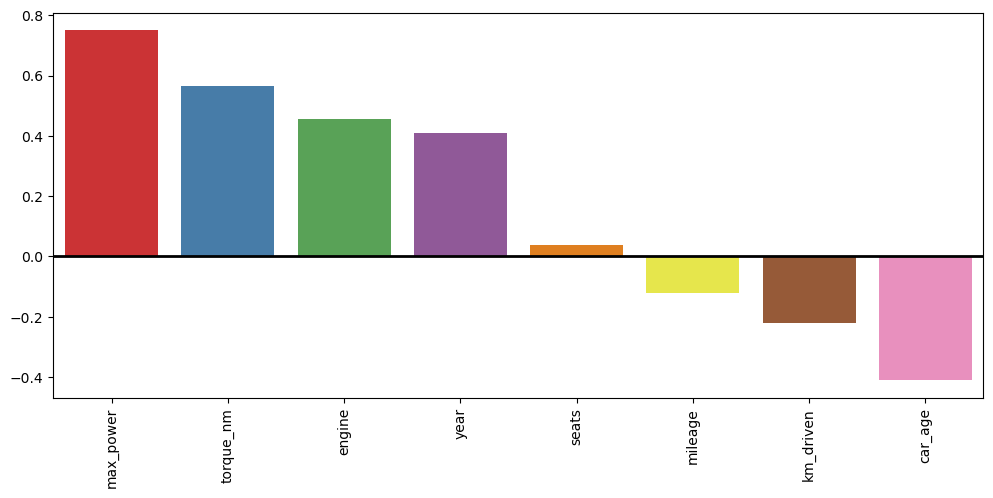

In [106]:
correlation(data)

Calling the correlation function again as we have more numeric features after data preprocessing. we will also run Chi square test on the categorical columns to check if they are statistically significant.

In [108]:
from scipy.stats import chi2_contingency

In [109]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'car_name', 'car_variant', 'torque_nm', 'car_age'],
      dtype='object')

In [110]:
mean_price=data['selling_price'].mean()
data['selling_price_variation']=data['selling_price'].apply(lambda x: "above_average" if x>mean_price
                                                            else("below_average" if x<mean_price else"average"))


In [111]:
categorical_data=data.select_dtypes(include='object').drop(['name','torque'],axis=1)

Text(0.5, 1.0, 'p_value_Heatmap ')

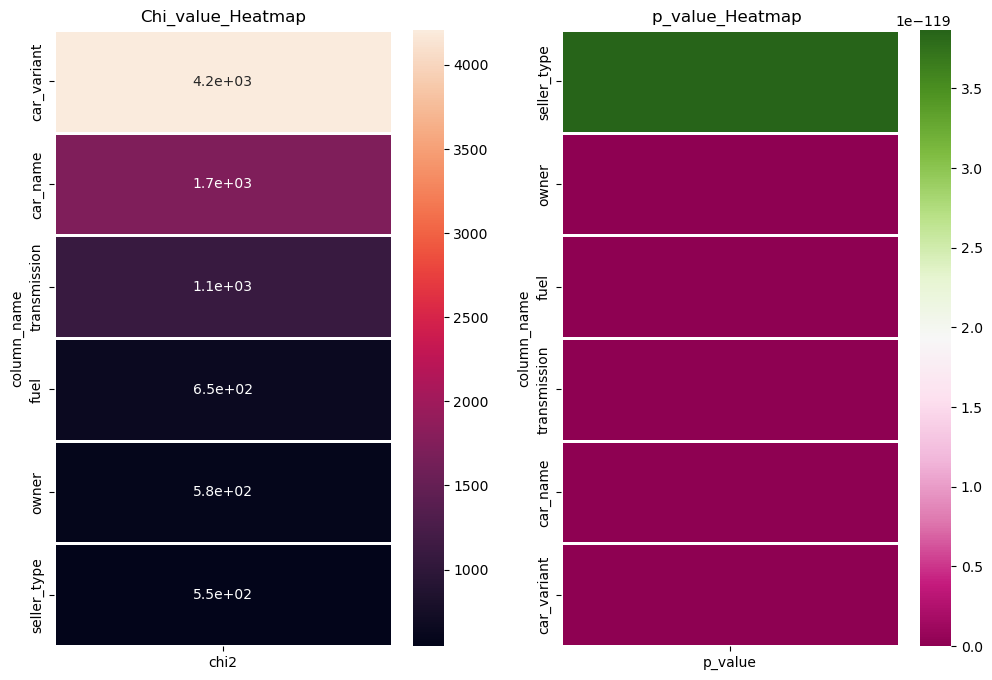

In [112]:
results=[]
for cols in categorical_data.columns:
    if cols!="selling_price_variation":
        table=pd.crosstab(data[cols],data['selling_price_variation'])
        chi2, p, dof, exp = chi2_contingency(table)
        results.append([cols,chi2,p])
chi_df=pd.DataFrame(results,columns=['column_name','chi2','p_value'])
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(12, 8))
sns.heatmap(data=chi_df.set_index('column_name')[['chi2']].sort_values(by='chi2', ascending=False),annot=True,lw=1,ax=axis[0])
axis[0].set_title("Chi_value_Heatmap")
sns.heatmap(data=chi_df.set_index('column_name')[['p_value']].sort_values(by='p_value',ascending=False),cmap="PiYG",lw=1,ax=axis[1])
axis[1].set_title("p_value_Heatmap ")


In [113]:
chi_df

,column_name,chi2,p_value
0,fuel,645.834393,1.165507e-139
1,seller_type,545.311724,3.864236e-119
2,transmission,1098.495786,7.011601e-241
3,owner,579.727774,3.779229e-124
4,car_name,1728.341487,0.000000e+00
5,car_variant,4205.384026,0.000000e+00


the above hypothesis test reveals that almost all of our categorical features are statistically significant to "selling price variation"

C:\Users\rautu\AppData\Local\Temp\ipykernel_11584\1827813856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data.groupby('car_name')['selling_price'].max().sort_values(ascending=False)[:5].transpose(),palette='Set1');


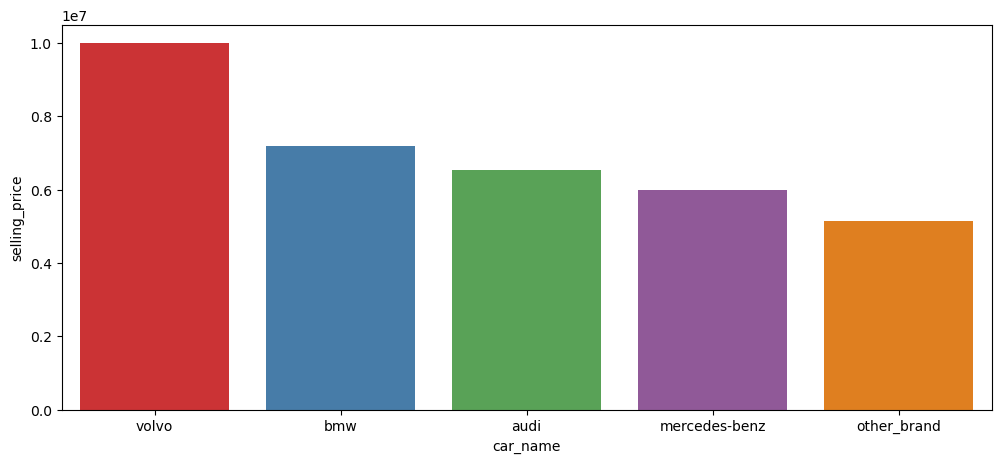

In [115]:
plt.figure(figsize=(12,5))
sns.barplot(data=data.groupby('car_name')['selling_price'].max().sort_values(ascending=False)[:5].transpose(),palette='Set1');

Above bar graph shows the top 5 most expensive car.

In [117]:
#plt.figure(figsize=(12,10))
#sns.pairplot(data=data.select_dtypes(include='number').drop(['seats','mileage'],axis=1),diag_kind=False)

in next visualization, we will look at the relationship of those features with selling price only.

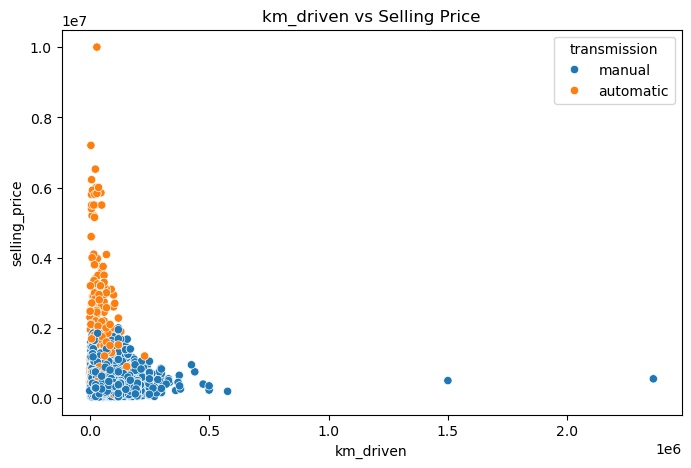

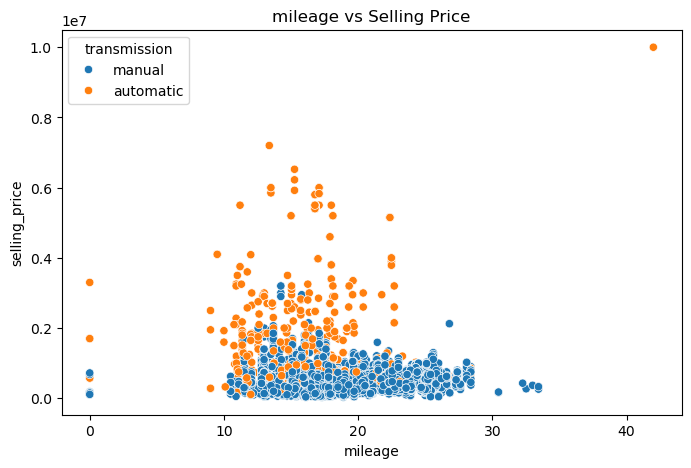

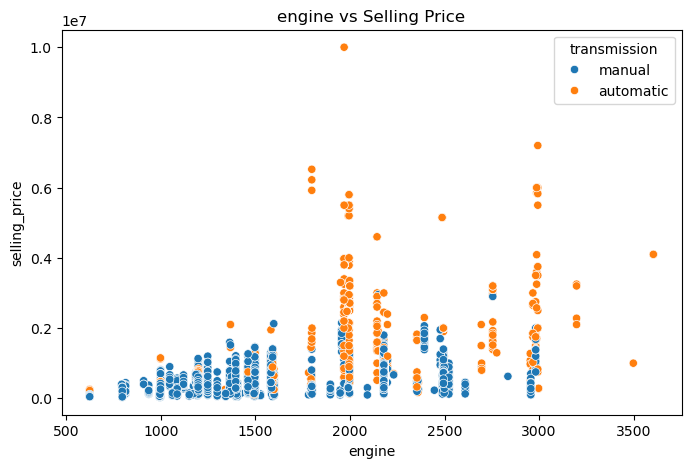

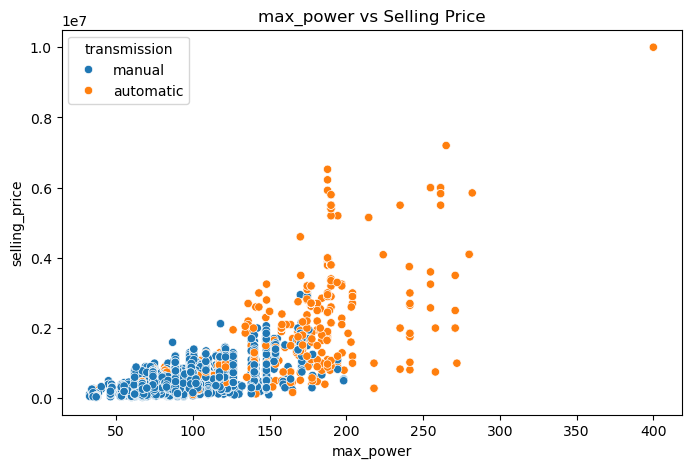

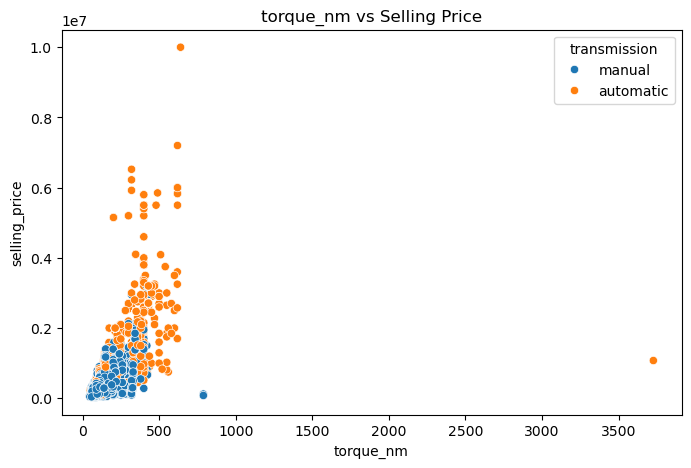

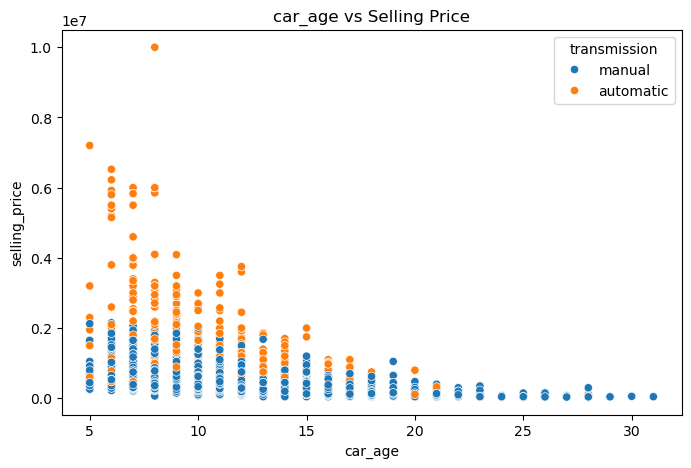

In [119]:
new_cols=data.select_dtypes(include='number').drop('seats',axis=1).columns
for cols in new_cols:
    if cols not in ['selling_price','year']:
        plt.figure(figsize=(8,5))
        plt.title(f'{cols} vs Selling Price')
        sns.scatterplot(data=data,x=cols,y='selling_price',hue='transmission')
                    
                      

the above scatter plot shows the relationship between the highly correlated features with selling price differentiated by "transmission."
it is clear that the automatic cars are expensive than the manual car regardless of car features. In the next step, we will look selling price based on transmission and fuel. moreover, there are few considerations i am making from above scatter plot.
1. i am going to cap the car age. i will drop the car that are older than 30 years old. i.e. just one manual car.
2. Also, there is 14 seater car. I will drop that car as well. 

In [121]:
data=data.drop(data[data['car_age']>30].index).reset_index(drop=True)

In [122]:
data=data.drop(data[data['seats']==14].index).reset_index(drop=True)

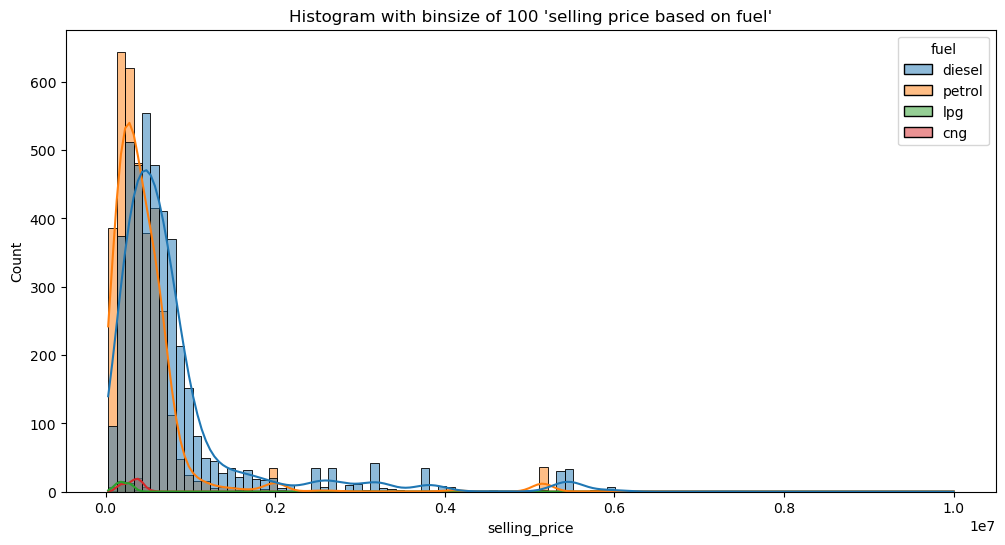

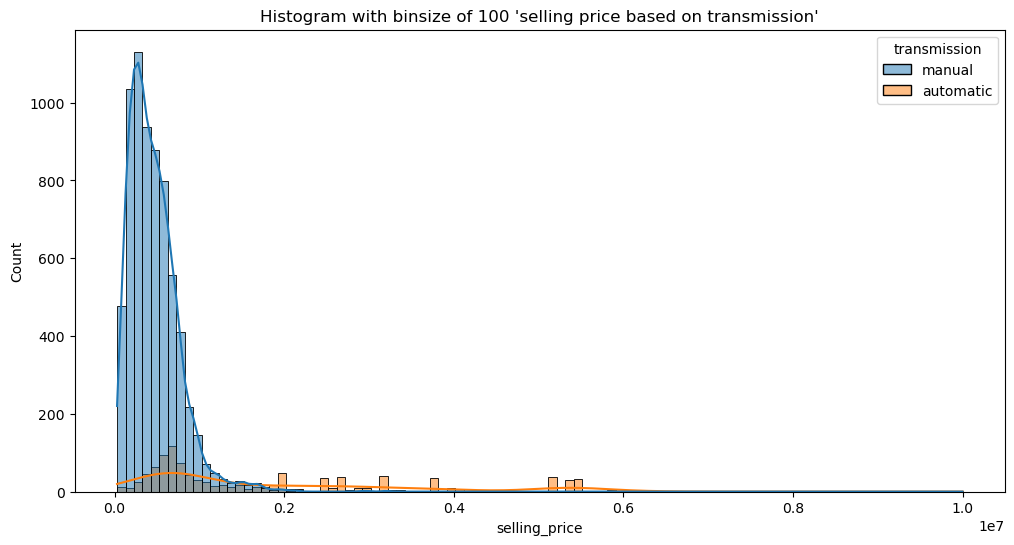

In [123]:
new_cols=['fuel','transmission']
for cols in new_cols:
    plt.figure(figsize=(12,6))
    plt.title(f"Histogram with binsize of 100 'selling price based on {cols}'")
    sns.histplot(data=data,x='selling_price', kde=True, hue=cols ,bins=100)

from above histogram, we can conclude following:
1. selling price is heavily right skewed, meaning there are few extreme selling price.
2. Most of the price in the dataset are less than 2000000.
3. between automatic and manual transmission cars, frequency of manual transmission car is more than automatic for price less than 2000000. it is the other way around for the price more than 2000000.
4. the dataset contains huge number of petrol and diesel cars than LPG and CNG.

### In next step, we will take care of OUTLIERS.

<Axes: xlabel='selling_price'>

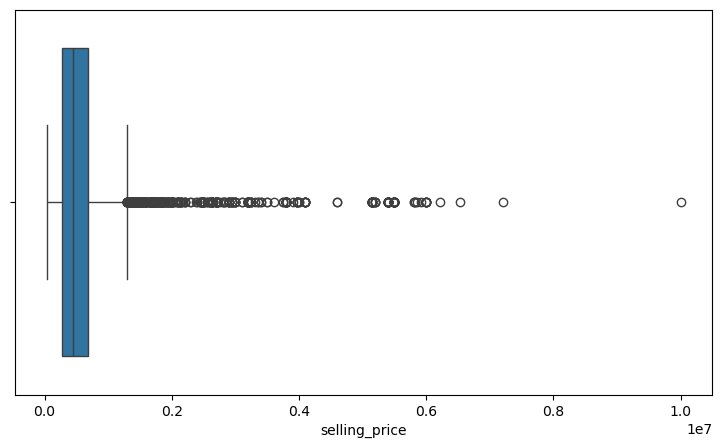

In [126]:
plt.figure(figsize=(9,5))
sns.boxplot(data=data,x='selling_price')

Based on our above analysis, I believe that those outliers are all automatic transmission cars. we will find those outliers and if they are only automatic cars, we will keep those outliers. Also, if some outliers are manual car, we will drop those rows.
For outliers handling, i will follow two approaches:
i have decided to make two different cutoff points for two different transmission cars:
1. for manual car, i will take everything beyond upper whisker as outliers and drop them.
2. for automatic car, i will make cut of point at 0.4*10 power 7 and drop those records that have more than this cut off value.
3. NOTE THAT WE ARE TRYING TO PRESERVE THE VARIANCE OF ORIGINAL DATA AS MUCH AS POSSIBLE.

#### for manual cars

In [129]:
Q1=np.percentile(data['selling_price'],0.25)
Q2=np.percentile(data['selling_price'],0.5)
Q3=np.percentile(data['selling_price'],0.75)
IQR=Q3-Q1
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [130]:
Q3

50274.99999999999

In [131]:
upper_whisker

63549.99999999997

In [132]:
len(data[(data['selling_price']>upper_whisker)&(data['transmission']=='manual')])

6754

There is almost all the manual car data that fulfill above conditions(based on IQR AND UPPERWHISKER). so we have a lot of manual cars as outliers.
now we check for the number of outlier ("manual") that are above our preset threshold of 4000000.

In [134]:
data[(data['selling_price']>4000000)&(data['transmission']=='manual')]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name,car_variant,torque_nm,car_age,selling_price_variation


but there are no manual cars that are above our cutoff point range. so i am not dropping any manual car.

#### for Automatic cars

In [137]:
data[(data['selling_price']>upper_whisker)&(data['transmission']=='automatic')]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name,car_variant,torque_nm,car_age,selling_price_variation
39,jeep compass 1.4 limited plus bsiv,2019,2100000,5000,petrol,individual,automatic,first owner,16.00,1368,160.77,250nm@ 1750-2500rpm,5.0,other_brand,other_model,250.000000,6,above_average
42,maruti swift dzire vxi at,2018,675000,23300,petrol,dealer,automatic,first owner,18.50,1197,83.14,115nm@ 4000rpm,5.0,maruti,swift,115.000000,7,above_average
47,mercedes-benz b class b180,2014,1450000,27800,diesel,dealer,automatic,second owner,14.80,2143,120.70,200nm@ 1250-4000rpm,5.0,mercedes-benz,b,200.000000,11,above_average
53,toyota innova crysta 2.8 zx at bsiv,2016,1650000,127700,diesel,dealer,automatic,second owner,11.36,2755,171.50,360nm@ 1200-3400rpm,7.0,toyota,innova,360.000000,9,above_average
55,audi a6 2.0 tdi technology,2013,1750000,33900,diesel,dealer,automatic,second owner,17.68,1968,174.33,380nm@ 1750-2500rpm,5.0,audi,a6,380.000000,12,above_average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,honda accord 2.4 a/t,2013,580000,50000,petrol,dealer,automatic,first owner,11.70,2354,177.60,222nm@ 4300rpm,5.0,honda,accord,222.000000,12,below_average
7819,audi a3 40 tfsi premium,2017,1689999,8000,petrol,dealer,automatic,first owner,16.60,1798,177.50,250nm@ 1250-5000rpm,5.0,audi,a3,250.000000,8,above_average
7824,hyundai creta 1.6 sx automatic,2016,890000,40000,petrol,dealer,automatic,first owner,14.80,1591,121.30,151nm@ 4850rpm,5.0,hyundai,creta,151.000000,9,above_average
7841,honda city zxi at,2005,110000,100000,petrol,individual,automatic,second owner,12.00,1493,100.00,13.1kgm@ 4600rpm,5.0,honda,city,128.467115,20,below_average


same for the automatic transmission car, there are no automatic cars that are within the upper whisker range. so, all automatic cars are outliers as per the box plot.
we will, however, keep most of those automatic cars and 0nly considering dropping that have really extreme value.
the decision is made based on pure team analysis based on the cut off point.


In [139]:
data[(data['selling_price']>4000000)&(data['transmission']=='automatic')]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name,car_variant,torque_nm,car_age,selling_price_variation
127,lexus es 300h,2019,5150000,20000,petrol,dealer,automatic,first owner,22.37,2487,214.56,202nm@ 3600-5200rpm,5.0,other_brand,other_model,202.0,6,above_average
129,jeep wrangler 2016-2019 3.6 4x4,2017,4100000,17000,petrol,individual,automatic,first owner,9.50,3604,280.00,347nm@ 4300rpm,5.0,other_brand,other_model,347.0,8,above_average
130,mercedes-benz s-class s 350 cdi,2017,6000000,37000,diesel,dealer,automatic,first owner,13.50,2987,254.79,620nm@ 1600-2400rpm,5.0,mercedes-benz,s-class,620.0,8,above_average
133,bmw x4 m sport x xdrive20d,2019,5800000,7500,diesel,dealer,automatic,first owner,16.78,1995,190.00,400nm@ 1750-2500rpm,5.0,bmw,x4,400.0,6,above_average
141,mercedes-benz s-class s 350 cdi,2017,5850000,47000,diesel,dealer,automatic,first owner,13.50,2987,282.00,490nm@ 1600rpm,5.0,mercedes-benz,s-class,490.0,8,above_average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7522,bmw 5 series 520d luxury line,2019,5200000,10000,diesel,dealer,automatic,first owner,18.12,1995,190.00,400nm@ 1750-2500rpm,5.0,bmw,5,400.0,6,above_average
7623,lexus es 300h,2019,5150000,20000,petrol,dealer,automatic,first owner,22.37,2487,214.56,202nm@ 3600-5200rpm,5.0,other_brand,other_model,202.0,6,above_average
7636,bmw x4 m sport x xdrive20d,2019,5400000,7500,diesel,dealer,automatic,first owner,16.78,1995,190.00,400nm@ 1750-2500rpm,5.0,bmw,x4,400.0,6,above_average
7637,bmw x4 m sport x xdrive20d,2019,5500000,8500,diesel,dealer,automatic,first owner,16.78,1995,190.00,400nm@ 1750-2500rpm,5.0,bmw,x4,400.0,6,above_average


In [140]:
data=data.drop(data[(data['selling_price']>4000000)&(data['transmission']=='automatic')].index).reset_index(drop=True) #outlier removed.

so in our outliers removal steps, we have only removed those data points that are above 4000000. 

In [141]:
data=data.drop(['name','year','torque','selling_price_variation'],axis=1) #dropping redundant columns

#### for writing model contstraints

### Below is the record of shape of data before and after preprocessing and EDA steps:
1. total shape of original data= 8128 rows with 13 columns
   ##### after preprocessing
2. total data after cleaning and preprocessing= 7887 with 14 columns
3. total manual car records=6852
4. total automatic car records=1034
5. Automatic to Manual data ratio= ~1:6
6. total manual outliers(based on upper whisker metric)=0
7. total automatic outliers(based on using upper whisker metric)=1034
8. total automatic outliers(based on our threshold (4000000))=126
9. tOtal automatic car records after outlier removal=908
10. total volume of clean data=7760

In [144]:
data.describe()

,selling_price,km_driven,mileage,engine,max_power,seats,torque_nm,car_age
count,7.760000e+03,7.760000e+03,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000
mean,5.690713e+05,7.016429e+04,19.464182,1442.856959,89.592086,5.420361,175.578407,11.097809
std,5.366094e+05,5.680803e+04,4.019165,491.657863,32.424835,0.958125,95.988803,3.821355
min,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000,47.071920,5.000000
25%,2.617500e+05,3.500000e+04,16.800000,1197.000000,68.000000,5.000000,111.795810,8.000000
50%,4.500000e+05,6.000000e+04,19.330000,1248.000000,82.000000,5.000000,170.000000,10.000000
75%,6.650000e+05,9.800000e+04,22.320000,1498.000000,100.600000,5.000000,205.000000,13.000000
max,4.000000e+06,2.360457e+06,33.440000,3498.000000,272.000000,10.000000,3726.527000,30.000000


## PREDECTIVE MODELING

NOW WE ARE MOVING TO PREDECTIVE ANALYTICS WHERE WE WILL BUILD A FORECASTING MODEL AND EVALUATE ITS ACCURACY. 
FOR THIS PROJECT, WE WILL TRY WITH SEVERAL REGRESSION MODELS, EVALUATE EACH MODEL PERFORMANCE AND SELECT THE MODEL THAT BEST CAPTURE THE DATA PATTERNS..
NOTE THAT WE ARE AWARE OF DATA LEAKAGE SO WE FOLLOW THE STEPS THAT WILL TRAIN THE MODEL WITHOUT POTENTIAL DATA LEAKAGE.

In [147]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [148]:
X=data.drop('selling_price',axis=1)
y=data['selling_price']

In [149]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=100,stratify=X['transmission'])

In [150]:
X_val, X_test, y_val, y_test=train_test_split(X_temp, y_temp, test_size=0.2, random_state=100,stratify=X_temp['transmission'])

In [585]:
X_train.columns

Index(['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage',
       'engine', 'max_power', 'seats', 'car_name', 'car_variant', 'torque_nm',
       'car_age'],
      dtype='object')

In [587]:
X_train['seller_type'].value_counts()

seller_type
individual          4877
dealer               763
trustmark dealer     180
Name: count, dtype: int64

In [151]:
X_val.shape

(1552, 13)

In [152]:
X_test.shape

(388, 13)

In [153]:
one_hot_columns=X.select_dtypes(include='object').drop('car_variant',axis=1).columns

In [154]:
one_hot_columns

Index(['fuel', 'seller_type', 'transmission', 'owner', 'car_name'], dtype='object')

In [155]:
ordinal_columns=['car_variant']

In [156]:
data['car_variant']

0        swift
1        rapid
2         city
3          i20
4        swift
         ...  
7755       i20
7756     verna
7757     swift
7758    indigo
7759    indigo
Name: car_variant, Length: 7760, dtype: object

In [157]:
scale_columns=X.select_dtypes(include='number').columns

In [158]:
col_transformers=ColumnTransformer(transformers=[("one_hot", OneHotEncoder(handle_unknown='ignore'), one_hot_columns),
                                                ("ordinal", OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-999), ordinal_columns),
                                                ("scaler", StandardScaler(), scale_columns)])

In [159]:
def grid_func(model,param_grids):
    pipe=Pipeline(steps=[('transformer', col_transformers),
                         ('estimator',model)])
    grid=GridSearchCV(estimator=pipe, param_grid=param_grids, cv=5)
                    
    grid.fit(X_train,y_train)
    return grid.best_params_
 

this above function does all the steps together and return the best parameter for the specified model. Now i will make another function that will then take the best parameter reported by GridsearchCV and report the accuracy metrics. after all the analysis, i will make a final pipeline that consists of all preprocessing steps and our final model.

In [161]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [162]:
def my_model(model):
    pipe=Pipeline(steps=[('transformer', col_transformers),
                    ('model', model)])
    pipe.fit(X_train, y_train)
    prediction=pipe.predict(X_val)
    MAE=mean_absolute_error(y_val,prediction)
    rmse=np.sqrt(mean_squared_error(y_val,prediction))
    r_score=r2_score(y_val,prediction)
    print(f"Based on the use of {model},\nMAE score={MAE:.2f}, RMSE={rmse:.2f}, r2={r_score:.2f}.")
    print(f"{model} captures {r_score*100:.2f}% of the variance in the data.")


## Linear Regression
### USING RIDGE REGRESSION

In [164]:
from sklearn.linear_model import Ridge

In [165]:
ridge_model=Ridge(max_iter=100000)

In [166]:
grid_func(model=ridge_model, param_grids={'estimator__alpha':[0.1,0.5,0.7,1,0.2,0.3],'estimator__solver':['auto']})

{'estimator__alpha': 0.1, 'estimator__solver': 'auto'}

In [167]:
my_model(model=Ridge(alpha=0.1,solver='auto'))

Based on the use of Ridge(alpha=0.1),
MAE score=136315.41, RMSE=232570.75, r2=0.82.
Ridge(alpha=0.1) captures 81.81% of the variance in the data.


### Simple Linear Regression

In [169]:
from sklearn.linear_model import LinearRegression

In [170]:
grid_func(model=LinearRegression(),param_grids={})

{}

In [171]:
my_model(model=LinearRegression())

Based on the use of LinearRegression(),
MAE score=136237.54, RMSE=232436.24, r2=0.82.
LinearRegression() captures 81.83% of the variance in the data.


### Elastic Net

In [173]:
from sklearn.linear_model import ElasticNet

In [174]:
#help(ElasticNet)

In [175]:
grid_func(model=ElasticNet(max_iter=10000),param_grids={'estimator__alpha':[0.1,0.5,1],'estimator__l1_ratio':[0.1,0.5,1]})

{'estimator__alpha': 0.1, 'estimator__l1_ratio': 1}

In [176]:
my_model(model=ElasticNet(alpha=0.1,l1_ratio=1,max_iter=10000))

Based on the use of ElasticNet(alpha=0.1, l1_ratio=1, max_iter=100000),
MAE score=136239.35, RMSE=232439.65, r2=0.82.
ElasticNet(alpha=0.1, l1_ratio=1, max_iter=100000) captures 81.83% of the variance in the data.


## TREE BASED  MODEL
### RANDOM FOREST REGRESSOR

In [178]:
from sklearn.ensemble import RandomForestRegressor

In [179]:
#help(RandomForestRegressor)

In [180]:
grid_func(model=RandomForestRegressor(), param_grids={'estimator__n_estimators':[100,200,300],'estimator__max_depth':[None,10]})

{'estimator__max_depth': None, 'estimator__n_estimators': 100}

In [195]:
my_model(model=RandomForestRegressor(n_estimators=100,max_depth=None))

Based on the use of RandomForestRegressor(),
MAE score=66424.77, RMSE=122857.53, r2=0.95.
RandomForestRegressor() captures 94.92% of the variance in the data.


It proves that there are some non-linear relationship between features and labels which RandomForestRegressor captures very well with r2_score of 94.92%.

### XG BOOST REGRESSOR


In [184]:
from xgboost import XGBRegressor

In [185]:
grid_func(model=XGBRegressor(), param_grids={'estimator__n_estimators':[100,200,300],'estimator__learning_rate':[0.01,0.1,0.2]})

{'estimator__learning_rate': 0.2, 'estimator__n_estimators': 100}

In [197]:
my_model(model=XGBRegressor(n_estimators=100,learning_rate=0.2))

Based on the use of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...),
MAE score=64879.60, RMSE=117348.57, r2=0.95.
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_ro

In [200]:
performance={'LinearRegression':[136237.54,232436.24,0.82],'RidgeRegression':[136315.41,232570.75,0.82],
            'ElasticNet':[136239.35,232439.65,0.82],'RandomForestRegressor':[66424.77,122857.53,0.95],'XGBRegressor':[64879.60,117348.57,0.95]}  

In [202]:
performance_benchmark=pd.DataFrame(data=performance,index=['MAE','RMSE','R2_SCORE'])

In [204]:
performance_benchmark

,LinearRegression,RidgeRegression,ElasticNet,RandomForestRegressor,XGBRegressor
MAE,136237.54,136315.41,136239.35,66424.77,64879.60
RMSE,232436.24,232570.75,232439.65,122857.53,117348.57
R2_SCORE,0.82,0.82,0.82,0.95,0.95


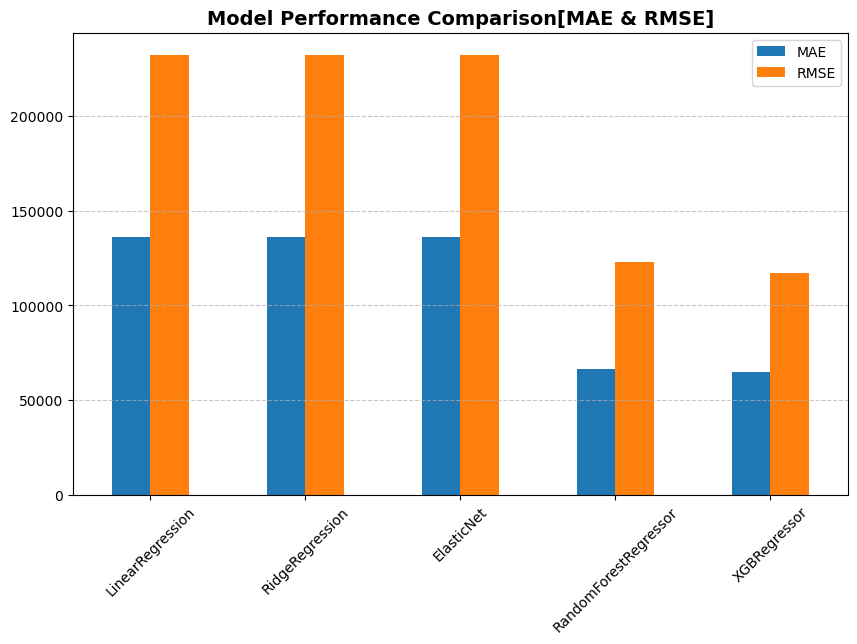

In [206]:
performance_benchmark[:2].T.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison[MAE & RMSE]",fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45);

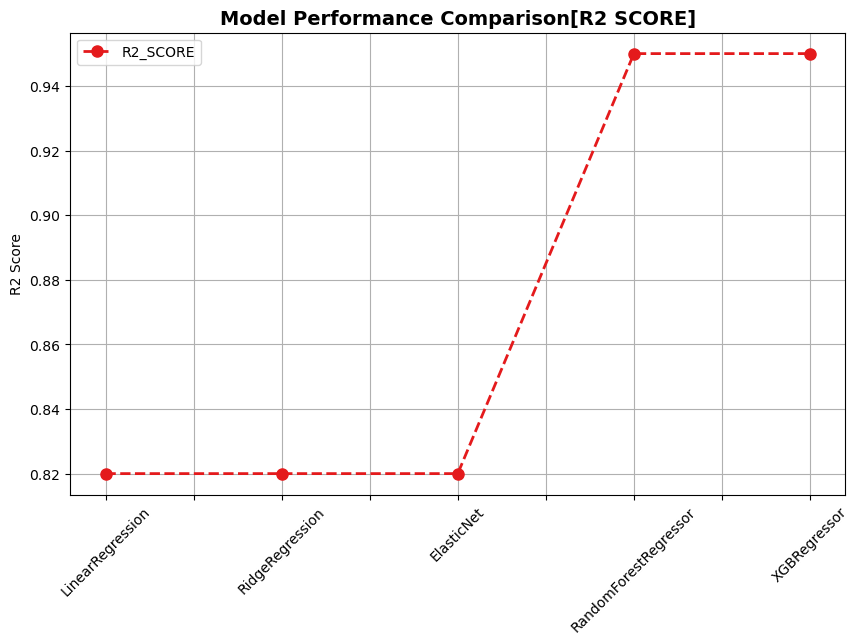

In [208]:
performance_benchmark[2:].T.plot(kind='line', figsize=(10,6),lw=2,marker='o',markersize=8,ls='--',grid=True,cmap='Set1')
plt.title("Model Performance Comparison[R2 SCORE]",fontsize=14, fontweight='bold')
plt.ylabel('R2 Score')
plt.xticks(rotation=45);

SINCE THE TREE BASED MODEL SHOWED BETTER PERFORMANCE THAN LINEAR MODEL, WE WILL SELECT RANDOMFORESTREGRESSOR WITH THE SAME HYPERPARAMETER AS OUR FINAL MODEL.

##### MODEL PERFORMANCE IN THE HOLD-OUT TEST SET. THE PERFORMANCE SHOWN BELOW WILL BE CONSIDERED AS THE FINAL MODEL ACCURACY METRIC. 

In [212]:
pipe=Pipeline(steps=[('transformer', col_transformers),
                    ('model', RandomForestRegressor(n_estimators=100,max_depth=None))])
pipe.fit(X_train, y_train)
prediction=pipe.predict(X_test)
final_mae=mean_absolute_error(y_test,prediction)
final_rmse=np.sqrt(mean_squared_error(y_test,prediction))
final_r_score=r2_score(y_test,prediction)
print(f"The final evaluation metric of above {pipe['model']} on hold-out test dataset is:\nMAE SCORE:{final_mae:.2f} \nRMSE SCORE:{final_rmse:.2f} \nr2_score:{final_r_score:.2f}")


The final evaluation metric of above RandomForestRegressor() on hold-out test dataset is:
MAE SCORE:65625.41 
RMSE SCORE:111596.86 
r2_score:0.96


In [214]:
final_metric=pd.DataFrame({'model':'RandomForestRegressor','MAE':final_mae,'RMSE':final_rmse,'r2_Score':final_r_score},index=["model evaluation on test set"]).transpose()

In [216]:
final_metric

,model evaluation on test set
model,RandomForestRegressor
MAE,65625.41031
RMSE,111596.861583
r2_Score,0.955578


## SAVING OUR FINAL CAPSTONE PROJECT MODEL

In [228]:
from joblib import dump,load

In [354]:
final_model_pipeline=Pipeline(steps=[('transformer', col_transformers),
                    ('model', RandomForestRegressor(n_estimators=100,max_depth=None))])

In [223]:
final_model_pipeline.fit(X,y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['fuel', 'seller_type', 'transmission', 'owner', 'car_name'], dtype='object')),
                                                 ('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-999),
                                                  ['car_variant']),
                                                 ('scaler', StandardScaler(),
                                                  Index(['km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_nm',
       'car_age'],
      dtype='object'))])),
                ('model', RandomForestRegressor())])

In [230]:
dump(final_model_pipeline,"pricing_project_model.pkl")

['pricing_project_model.pkl']

In [233]:
dump(one_hot_columns.tolist(), "one_hot_columns.pkl")

['one_hot_columns.pkl']

In [235]:
dump(ordinal_columns, "ordinal_columns.pkl")

['ordinal_columns.pkl']

In [237]:
dump(scale_columns.tolist(), "scale_columns.pkl")

['scale_columns.pkl']

In [239]:
X.columns

Index(['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage',
       'engine', 'max_power', 'seats', 'car_name', 'car_variant', 'torque_nm',
       'car_age'],
      dtype='object')

# Below i am going to work on building a recommendation system and teseting the entire system. I have obtained an api key ("groc ai platform") which i will use for this system to analyze the price predicted by our forecasting model and gives the smart recommendation based on every input features.NOTE that we will now directly work on each project deliverables starting integrating GROC AI with project functional requirements specific PROMPTS that will give us the clear and consise recommendations.

In [295]:
input_df=pd.DataFrame([{
    'km_driven': 75000,
    'fuel': 'Petrol',
    'seller_type': 'dealer',
    'transmission': 'automatic',
    'owner': 'firstowner',
    'mileage': 18.5,
    'engine': 1500,
    'max_power': 15,
    'seats': 5,
    'car_name': 'toyota',
    'car_variant': 'corolla',
    'torque_nm': 140,
    'car_age': 5}])

In [579]:
final_model_pipeline.predict(input_df)[0] #model prediction on above features

783925.0

In [350]:
import requests

# Groq API key
# api key has been removed for github uploads/security

url = "https://api.groq.com/openai/v1/chat/completions"
headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}


data = {
    "model": "llama-3.1-13b",
    "messages": [
        {"role": "user", "content": "Say 'Groq Llama-3 test successful'."}
    ]
}

import json
print(json.dumps(response.json(), indent=2))



{
  "error": {
    "message": "The model `llama-3.1-70b-versatile` has been decommissioned and is no longer supported. Please refer to https://console.groq.com/docs/deprecations for a recommendation on which model to use instead.",
    "type": "invalid_request_error",
    "code": "model_decommissioned"
  }
}


In [576]:
import os


# api key has been removed for github uploads/security
if not API_KEY:
    API_KEY = os.getenv("GROQ_API_KEY")

URL = "https://api.groq.com/openai/v1/chat/completions"

def ask_groq(prompt: str, model: str = "llama-3.3-70b-versatile")
    headers = {
        "Authorization": f"Bearer {API_KEY}",
        "Content-Type": "application/json",
    }
    data = {
        "model": model,
        "messages": [
            {"role": "system", "content": "You are an assistant that gives concise price‑report for used car."},
            {"role": "user", "content": prompt}
        ],
        "temperature": 0.4,
        "max_completion_tokens": 256,  
        "top_p": 1
    }
    resp = requests.post(URL, headers=headers, json=data)
    resp.raise_for_status()
    j = resp.json()
    
    return j["choices"][0]["message"]["content"]


print(ask_groq("What could be a reasonable price in INR for a 2005 Maruti Swift with 120000 km and average condition in India?"))


A reasonable price for a 2005 Maruti Swift with 120,000 km and average condition in India could be between ₹1,20,000 to ₹1,80,000. However, prices may vary depending on the location, fuel type (petrol or diesel), and other factors.


### the above output proves that the model and the api key are functional.so now we will integrate the above groq model with api key in our recommendation system project.

In [414]:
final_model_pipeline = load("pricing_project_model.pkl")
one_hot_columns = load("one_hot_columns.pkl")
ordinal_columns = load("ordinal_columns.pkl")
scale_columns = load("scale_columns.pkl")

In [489]:
def classify_risk(z_score):
    if z_score > 1:
        return "Very High Price (Customer Churn Risk)"
    elif z_score < -1:
        return "Very Low Price (Direct Revenue Loss)"
    else:
        return "Moderate Price"

In [564]:
user_input = pd.DataFrame([{
    'km_driven': 75000,
    'fuel': 'Petrol',
    'seller_type': 'dealer',
    'transmission': 'manual',
    'owner': 'firstowner',
    'mileage': 18.5,
    'engine': 1500,
    'max_power': 15,
    'seats': 5,
    'car_name': 'honda',
    'car_variant': 'accord',
    'torque_nm': 140,
    'car_age': 5}])

df_input = pd.DataFrame(user_input)


In [743]:
def generate_smart_report(user_input, model="llama-3.3-70b-versatile"):
    # preprocessing steps
    # api key has been removed for github uploads/security
    url = "https://api.groq.com/openai/v1/chat/completions"
    headers = {"Authorization": f"Bearer {api_key}"}
    df = pd.DataFrame(user_input)
    df.columns = df.columns.str.lower()

    # using our saved pipeline for prediction
    price = final_model_pipeline.predict(df)[0]
    rf_model = final_model_pipeline.named_steps['model']
    transformer = final_model_pipeline.named_steps['transformer']
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[-5:]
    feature_names = transformer.get_feature_names_out()
    X_transformed = transformer.transform(df)

    # Now we get predictions from all trees
    tree_predictions = np.array([tree.predict(X_transformed) for tree in rf_model.estimators_])

    # Computing mean prediction and uncertainty
    pred_mean = tree_predictions.mean()
    pred_std = tree_predictions.std()
    classify_risk = lambda z_score: ("very high risk(Customer Churn Risk)" if z_score > 1 else
                                    "very low price (Undervaluation Risk)" if z_score < -1 else
                                    "Moderate Price (Low Risk)")

    while True:
        print(f'\nBased on the features you have provided, the price for this car is {price:.2f}')
        a = input("Do you want to adjust the price (Yes/NO): ")

        if a.upper() == "NO":
            z_score = (price - mean_price) / pred_std

            # visualization
            fig, axis = plt.subplots(ncols=2, figsize=(12, 8))
            sns.histplot(x=tree_predictions.flatten(), bins=10, alpha=1, color='black', kde=True, ax=axis[0])
            axis[0].axvline(price, color='red', linestyle='--', lw=2, label=f'Predicted Price: {price:.2f}')
            axis[0].set_title('Random Forest Tree Predictions Distribution', fontsize=14, fontweight='bold')
            axis[0].set_xlabel('Price (INR)')
            axis[0].set_ylabel('Frequency')
            sns.heatmap(pd.DataFrame([importances[indices]], columns=feature_names[indices], index=['importance']).transpose(),
                        lw=1, ax=axis[1])
            axis[1].set_title('Feature Importances Heat Map', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()

            # generating AI report based on below customised prompts.
            prompt = f"""
            The forecasting model predicted the price of a {user_input['car_name']} as INR {price:.2f}.
            The Z_score value is {z_score:.2f}.
            The risk classification is:{classify_risk(z_score)}
            The input features are: {user_input}.
            The important features are:{feature_names[indices]}
            Provide a clear, concise explanation on 180 words on why the price might be great deal/ok deal or a risky deal.
            Mention potential customer churn or revenue loss if risky or potential growth if not risky, and highlight key features affecting this.
            if the risk is moderate, please suggest two recommendation in bullet.
            if there is no risk, please suggest why this would be the great deal in bullet.
            If possible, compare with at least one other dealer. NOTE that the dataset is from India and please compare it with indian market
            and give the price range if possible.
            """
            data = {"model": model, "messages": [{"role": "user", "content": prompt}]}
            response = requests.post(url, headers=headers, json=data)
            try:
                report = response.json()["choices"][0]["message"]["content"]
            except KeyError:
                report = f"[AI API Error] {response.text}"

            break  # exit loop when user says NO

        elif a.upper() == "YES":
            b = int(input('How would you like to adjust your price [-10 to 10 percent]: '))
            price = price + ((b / 100) * price)
            z_score = (price - mean_price) / pred_std

            # visualization
            fig, axis = plt.subplots(ncols=2, figsize=(12, 8))
            sns.histplot(x=tree_predictions.flatten(), bins=10, alpha=1, color='black', kde=True, ax=axis[0])
            axis[0].axvline(price, color='red', linestyle='--', lw=2, label=f'Predicted Price: {price:.2f}')
            axis[0].set_title('Random Forest Tree Predictions Distribution', fontsize=14, fontweight='bold')
            axis[0].set_xlabel('Price (INR)')
            axis[0].set_ylabel('Frequency')
            sns.heatmap(pd.DataFrame([importances[indices]], columns=feature_names[indices], index=['importance']).transpose(),
                        lw=1, ax=axis[1])
            axis[1].set_title('Feature Importances Heat Map', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()

            # AI report for this adjustment
            prompt = f"""
            The forecasting model predicted the price of a {user_input['car_name']} as INR {price:.2f}.
            The Z_score value is {z_score:.2f}.
            The risk classification is:{classify_risk(z_score)}
            The input features are: {user_input}.
            The important features are:{feature_names[indices]}
            Provide a clear, concise explanation on 180 words on why the price might be great deal/ok deal or a risky deal.
            Mention potential customer churn or revenue loss if risky or potential growth if not risky, and highlight key features affecting this.
            if the risk is moderate, please suggest two recommendation in bullet.
            if there is no risk, please suggest why this would be the great deal in bullet.
            If possible, compare with at least one other dealer. NOTE that the dataset is from India and please compare it with indian market
            and give the price range if possible.
            """
            data = {"model": model, "messages": [{"role": "user", "content": prompt}]}
            response = requests.post(url, headers=headers, json=data)
            try:
                report = response.json()["choices"][0]["message"]["content"]
            except KeyError:
                report = f"[AI API Error] {response.text}"

             # show report but continue loop for further adjustment

        else:
            print("Please enter a valid input.")

    # final return after user is done adjusting
    print(f"The final price based on the given car feature is : {price}")
    print(f"Recommendation:\n{report}")
 



Based on the features you have provided, the price for this car is 667169.98


Do you want to adjust the price (Yes/NO):  yes
How would you like to adjust your price [-10 to 10 percent]:  5


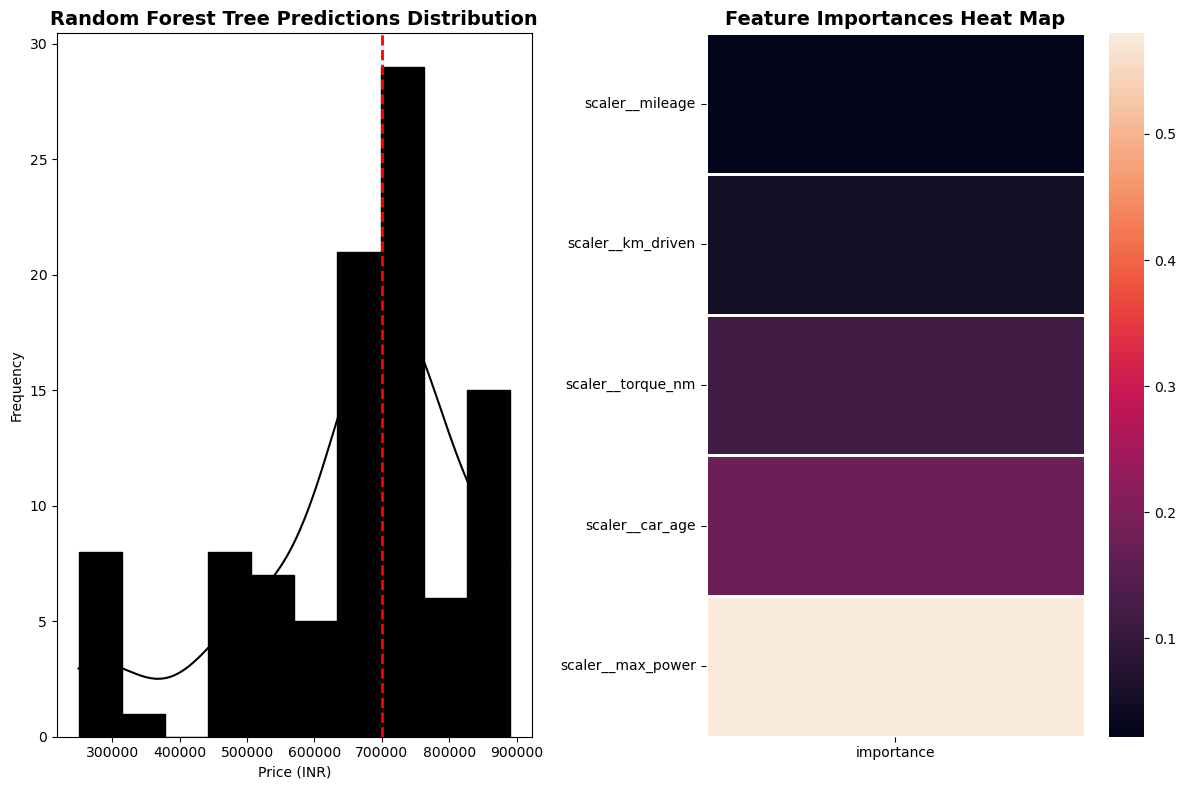


Based on the features you have provided, the price for this car is 700528.48


Do you want to adjust the price (Yes/NO):  10


Please enter a valid input.

Based on the features you have provided, the price for this car is 700528.48


Do you want to adjust the price (Yes/NO):  yes
How would you like to adjust your price [-10 to 10 percent]:  5


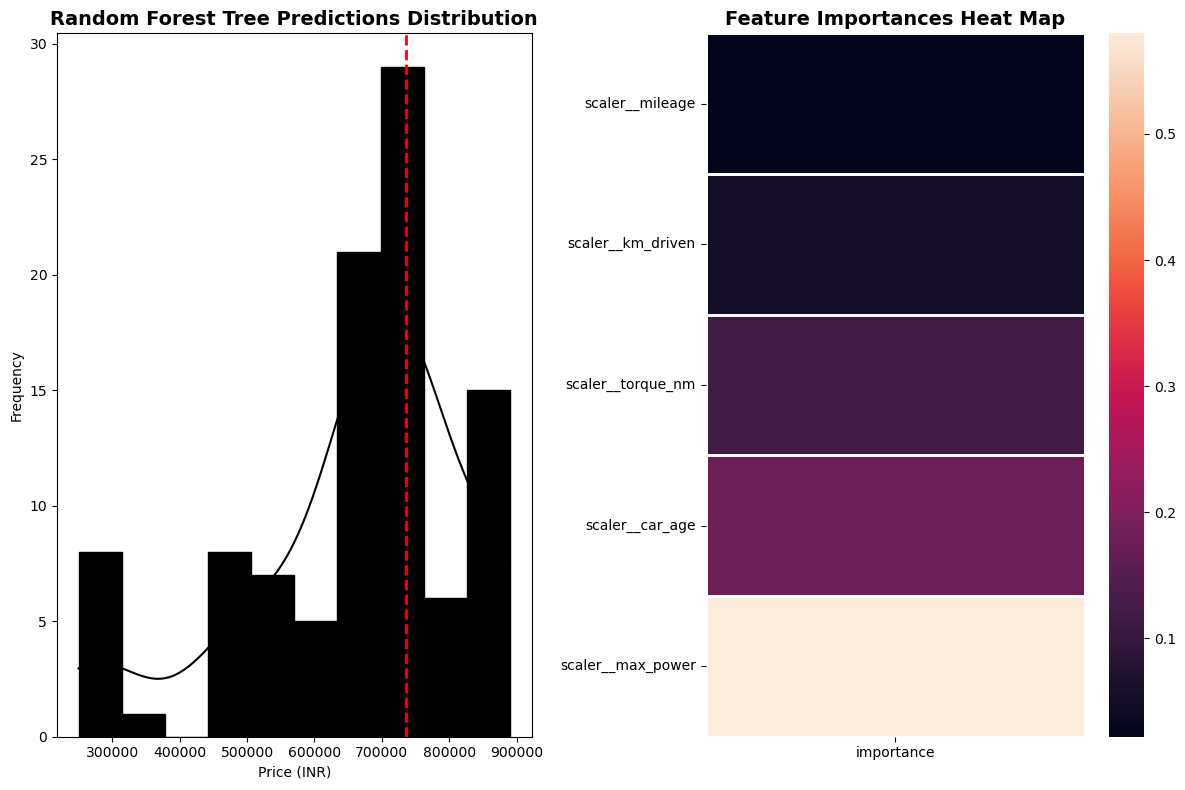


Based on the features you have provided, the price for this car is 735554.90


Do you want to adjust the price (Yes/NO):  no


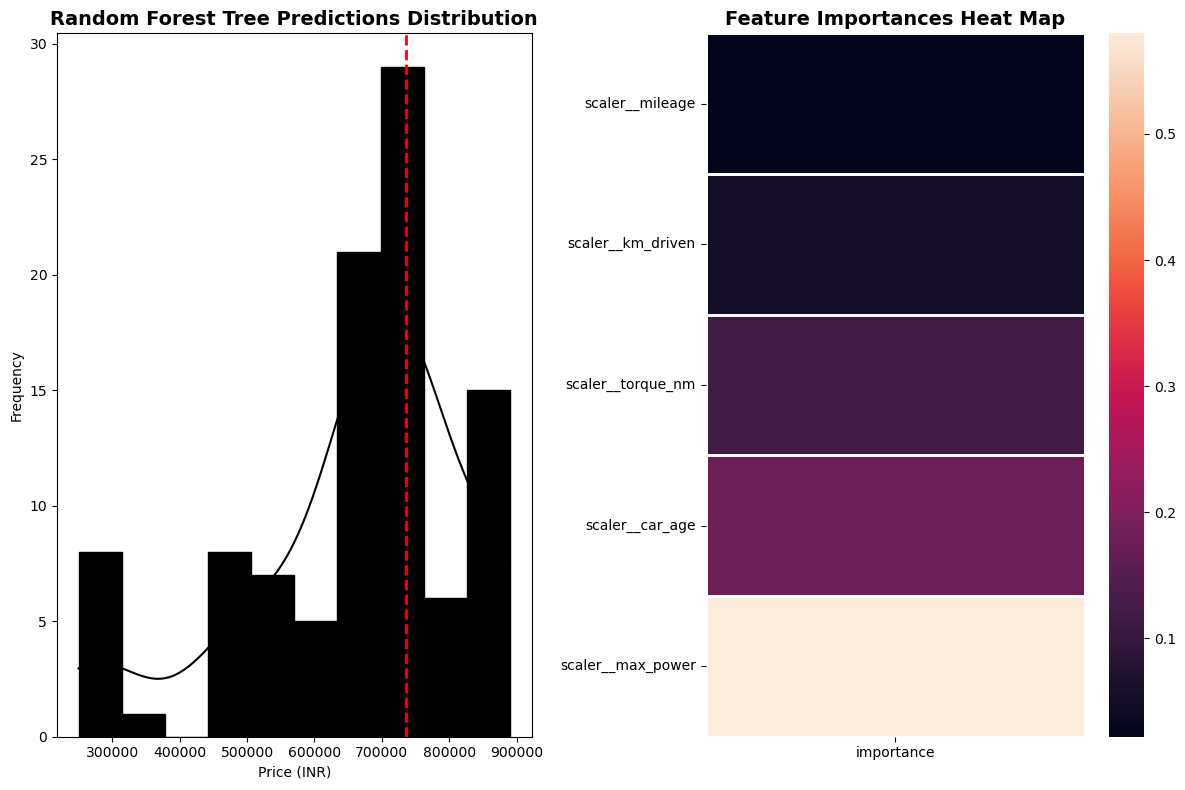

The final price based on the given car feature is : 735554.9029499999
Recommendation:
The predicted price of INR 735554.90 for the Honda Accord with the given features is considered a Moderate Price (Low Risk) deal. This is because the Z-score value is 0.54, which is relatively low, indicating that the price is not significantly deviating from the average market price. 

The key features affecting this price are mileage, km driven, torque, car age, and max power. With a mileage of 18.5 and a low car age of 5, this vehicle is likely to attract customers looking for a reliable and fuel-efficient car. 

Given the moderate risk, two recommendations are:
* Consider comparing prices with other dealers in the Indian market, such as Maruti Suzuki or Hyundai, to ensure the best deal.
* Look for similar models, such as the Honda City, which may offer competitive pricing, with prices ranging from INR 600,000 to INR 1,000,000 in the Indian market.

If this were a great deal, the potential benefits

In [745]:
generate_smart_report(user_input, model="llama-3.3-70b-versatile")

## Therefore we have build a recommendation system that will predict price, allow the stakeholders to simulate the model predicted price, gives you the clear picture of where the simulated or actual price lies between the price captured by each trees and at last AI using all these features to guide you with the recommendations and your pricing strategy.

#### In the next step, we will build a RESTAPI that consists of same logic that we used above in generate_smart_report() function. This cell terminates the work of our data analysis in jupyter notebook. we will have a .py file that serve as a RESTAPI. And a frontend that ask user input and shows user output.